# 00. 분석 준비하기
## 00- 1 chage directory & zip 파일 압축해제

In [3]:
from google.colab import drive
drive.mount('/content/drive')

### 한글 zip파일 안깨지고 푸는 법
- 이유) Windows 에서 압축(zip)한 파일을 Linux에서 압축풀때, 한글로 되어 있는 파일이 깨져서 나올 때가 있다. 이는 Windows의 한글 문자셋(CP949)과 Linux의 한글 문자셋(UTF-8)이 다르기에 발생하는 문제이다.


- 에러 :  'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte  


In [1]:
# import zipfile
# source_file = '건강보험심사평가원_감염병 진료비 통계_20201231.zip'

# with zipfile.ZipFile(source_file, 'r') as zf:
# 	zipinfo = zf.infolist()
# 	for info in zipinfo:
# 		info.filename = info.filename.encode('cp437').decode('euc-kr')
# 		zf.extract(info)

http://ko.dhkh.wikidok.net/wp-d/58177cc0649f8b5d79928ae3@1  
아래 코드
!unzip -O cp949 "건강보험심사평가원_감염병 진료비 통계_20201231.zip"

In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks"
# !unzip -O cp949 "건강보험심사평가원_감염병 진료비 통계_20201231.zip"

/content/drive/MyDrive/Colab Notebooks


## 00-2. 라이브러리 import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## matplotlib 한글 깨짐 해결 

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [5]:
# df_2020 = pd.read_csv("3. 건강보험심사평가원_감염병 진료비 통계 2020.csv")

# 데이터 설명(1)

## 건강보험심사평가원_감염병 진료비 통계
감염병 진료비 통계 / 진료일자 기준(심사분은 각 진료년+4개월) (예) 진료년월: 2020.1월~12월, 심사년월: 2020.1월~2021.4월 / 보험자: 건강보험 / 요양기관 종별: 약국 제외
- https://www.data.go.kr/data/15085952/fileData.do

## 00-3. 데이터불러오기

In [6]:
df_2020 = pd.read_csv("3. 건강보험심사평가원_감염병 진료비 통계 2020.csv", encoding='cp949')

In [7]:
df_2020.head(4)

,진료년도,상병명,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액
0,2020,A형간염,5202,12424,32342,6124106640,7857374850
1,2020,B형간염(급성),1947,3843,5332,655418520,895457130
2,2020,C형간염,37526,135787,142093,8739612430,16146596790
3,2020,b형헤모필루스인플루엔자,2505,3473,10445,1813023000,2223307570


## 감염병 분류기준
- 감염병은 물, 식품, 사람간의 접촉, 동물에 의해 전파되는 질병을 일컸는다.
- 질환 특성에 따라 법정감영벙을 1~5군으로 분류, 이외 감염병은 지정감염병으로 나누어 구별했다.
- 2020년 1월, 위와같은 분류방법을 긴급도, 심각도, 전파 력 등 높은 순서에 따라 '급'별 분류로 바뀌었다.
- 제1급	: 생물테러감염병 또는 치명률이 높거나 집단 발생의 우려가 커서 발생 또는 유행 즉시 신고하여야하고, 음압격리와 같은 높은 수준의 격리가 필요한 감염병

- 제2급	: 전파가능성을 고려하여 발생 또는 유행 시 24시간 이내에 신고하여야 하고, 격리가 필요한 감염병

- 제3급	: 발생을 계속 감시할 필요가 있어 발생 또는 유행 시 24시간 이내에 신고하여야 하는 감염병

- 제4급	: 제1급감염병부터 제3급감염병까지의 감염병 외에 유행여부를 조사하기 위해 표본감시 활동이 필요한 감염병
- https://www.gyeyang.go.kr/open_content/clinic/business/infect/acute_legal.jsp

# 데이터 설명 (2)
## 서울시 법정 감염병 발생현황 통계
- https://data.seoul.go.kr/dataList/37/S/2/datasetView.do#

In [8]:
df_seoul = pd.read_csv('서울시 법정 감염병 발생현황 통계.txt', sep = '\t',header = 1,  thousands=',')
df_seoul.head()

,법정감염병,법정감염병(2),발생/사망,합계,종로구,중구,용산구,성동구,광진구,동대문구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,제1급감염병,합계,발생,18996,574,547,453,500,458,779,...,"1,341",743,335,839,825,975,933,"1,112","1,925",613
1,제1급감염병,합계,사망,183,3,3,1,8,6,8,...,10,6,6,15,4,9,8,5,10,3
2,제1급감염병,신종감염병증후군,발생,18996,574,547,453,500,458,779,...,"1,341",743,335,839,825,975,933,"1,112","1,925",613
3,제1급감염병,신종감염병증후군,사망,183,3,3,1,8,6,8,...,10,6,6,15,4,9,8,5,10,3
4,제2급감염병,합계,발생,15002,394,172,276,385,461,554,...,740,973,299,721,522,493,638,854,"1,217",929


In [9]:
df_seoul.shape

(48, 29)

In [10]:
df_seoul['법정감염병'].unique()

array(['제1급감염병', '제2급감염병', '제3급감염병'], dtype=object)

In [11]:
df_seoul['법정감염병(2)'].unique()

array(['합계', '신종감염병증후군', '결핵', '수두', '홍역', '장티푸스', '파라티푸스', '세균성이질',
       '장출혈성대장균감염증', 'A형간염', '백일해', '유행성이하선염', '수막구균 감염증', '폐렴구균 감염증',
       '성홍열', '반코마이신내성황색포도알균 감염증', '카바페넴내성장내세균속균종 감염증', 'E형간염', '파상풍',
       'B형간염(급성)', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '쯔쯔가무시증',
       '렙토스피라증', '브루셀라증', '신증후군출혈열', '크로이츠펠트-야콥병 및 변종크로이츠펠트-야콥병', '뎅기열',
       '큐열', '라임병', '증열성혈소판감소증후군', '지카바이러스감염증'], dtype=object)

In [12]:
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   법정감염병     48 non-null     object
 1   법정감염병(2)  48 non-null     object
 2   발생/사망     48 non-null     object
 3   합계        48 non-null     int64 
 4   종로구       48 non-null     object
 5   중구        48 non-null     object
 6   용산구       48 non-null     object
 7   성동구       48 non-null     object
 8   광진구       48 non-null     object
 9   동대문구      48 non-null     object
 10  중랑구       48 non-null     object
 11  성북구       48 non-null     object
 12  강북구       48 non-null     object
 13  도봉구       48 non-null     object
 14  노원구       48 non-null     object
 15  은평구       48 non-null     object
 16  서대문구      48 non-null     object
 17  마포구       48 non-null     object
 18  양천구       48 non-null     object
 19  강서구       48 non-null     object
 20  구로구       48 non-null     object
 21  금천구       48 non-n

# 2020년 법정 감염병 진료비

In [13]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   진료년도      70 non-null     int64 
 1   상병명       70 non-null     object
 2   환자수       70 non-null     int64 
 3   명세서 청구건수  70 non-null     int64 
 4   입내원일수     70 non-null     int64 
 5   보험자부담금    70 non-null     int64 
 6   요양급여비용총액  70 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.0+ KB


In [14]:
df_2020['본인 일부부담금'] = df_2020['요양급여비용총액'] - df_2020['보험자부담금']
df_2020['요양급여비용총액/환자수'] = df_2020['요양급여비용총액'] / df_2020['환자수']

In [15]:
df_2020.sort_values(by = '요양급여비용총액/환자수', ascending = False)

,진료년도,상병명,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,본인 일부부담금,요양급여비용총액/환자수
39,2020,일본뇌염,26,114,1668,445309870,593012250,147702380,2.280816e+07
24,2020,비브리오패혈증,40,90,748,414776840,524825070,110048230,1.312063e+07
54,2020,크로이츠펠트-야곱병(CJD) 및 변종 크로이츠펠트-야곱병(vCJD),108,861,7486,1076974200,1266318450,189344250,1.172517e+07
29,2020,수막구균성수막염,2,3,50,15292490,20167860,4875370,1.008393e+07
69,2020,후천성면역결핍증(AIDS),12474,64503,76907,107731026850,119799643680,12068616830,9.603948e+06
...,...,...,...,...,...,...,...,...,...
43,2020,장흡충증,464,521,520,6469180,9055830,2586650,1.951688e+04
35,2020,요충증,1369,1520,1516,18506890,26477890,7971000,1.934104e+04
10,2020,디프테리아,2,2,2,20100,33600,13500,1.680000e+04
68,2020,회충증,647,743,754,6660070,9308060,2647990,1.438649e+04


In [16]:
df_2020.sort_values(by = '요양급여비용총액', ascending = False)

,진료년도,상병명,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,본인 일부부담금,요양급여비용총액/환자수
5,2020,결핵,45243,288772,599140,129927401550,135353970090,5426568540,2.991711e+06
69,2020,후천성면역결핍증(AIDS),12474,64503,76907,107731026850,119799643680,12068616830,9.603948e+06
38,2020,인플루엔자,757318,1078129,1312654,69269967660,85646295980,16376328320,1.130916e+05
59,2020,페렴구균,10730,27954,114669,44207738490,52424131830,8216393340,4.885753e+06
2,2020,C형간염,37526,135787,142093,8739612430,16146596790,7406984360,4.302776e+05
...,...,...,...,...,...,...,...,...,...
20,2020,발진티푸스,2,5,5,182720,254220,71500,1.271100e+05
56,2020,탄저,9,15,15,163480,235780,72300,2.619778e+04
60,2020,페스트,2,2,2,35570,50670,15100,2.533500e+04
10,2020,디프테리아,2,2,2,20100,33600,13500,1.680000e+04


In [17]:
df_2020.columns

Index(['진료년도', '상병명', '환자수', '명세서 청구건수', '입내원일수', '보험자부담금', '요양급여비용총액',
       '본인 일부부담금', '요양급여비용총액/환자수'],
      dtype='object')

## 그래프 그리기

### 요양급여비용총액에 따라 내림차순으로 정렬
- 결핵, AIDS, 인플루엔자, 폐렴구균 순으로 법정감염병진료비의 가장 높은 비율을 차지하고있다.

In [18]:
sorted_2020= df_2020.sort_values('요양급여비용총액')

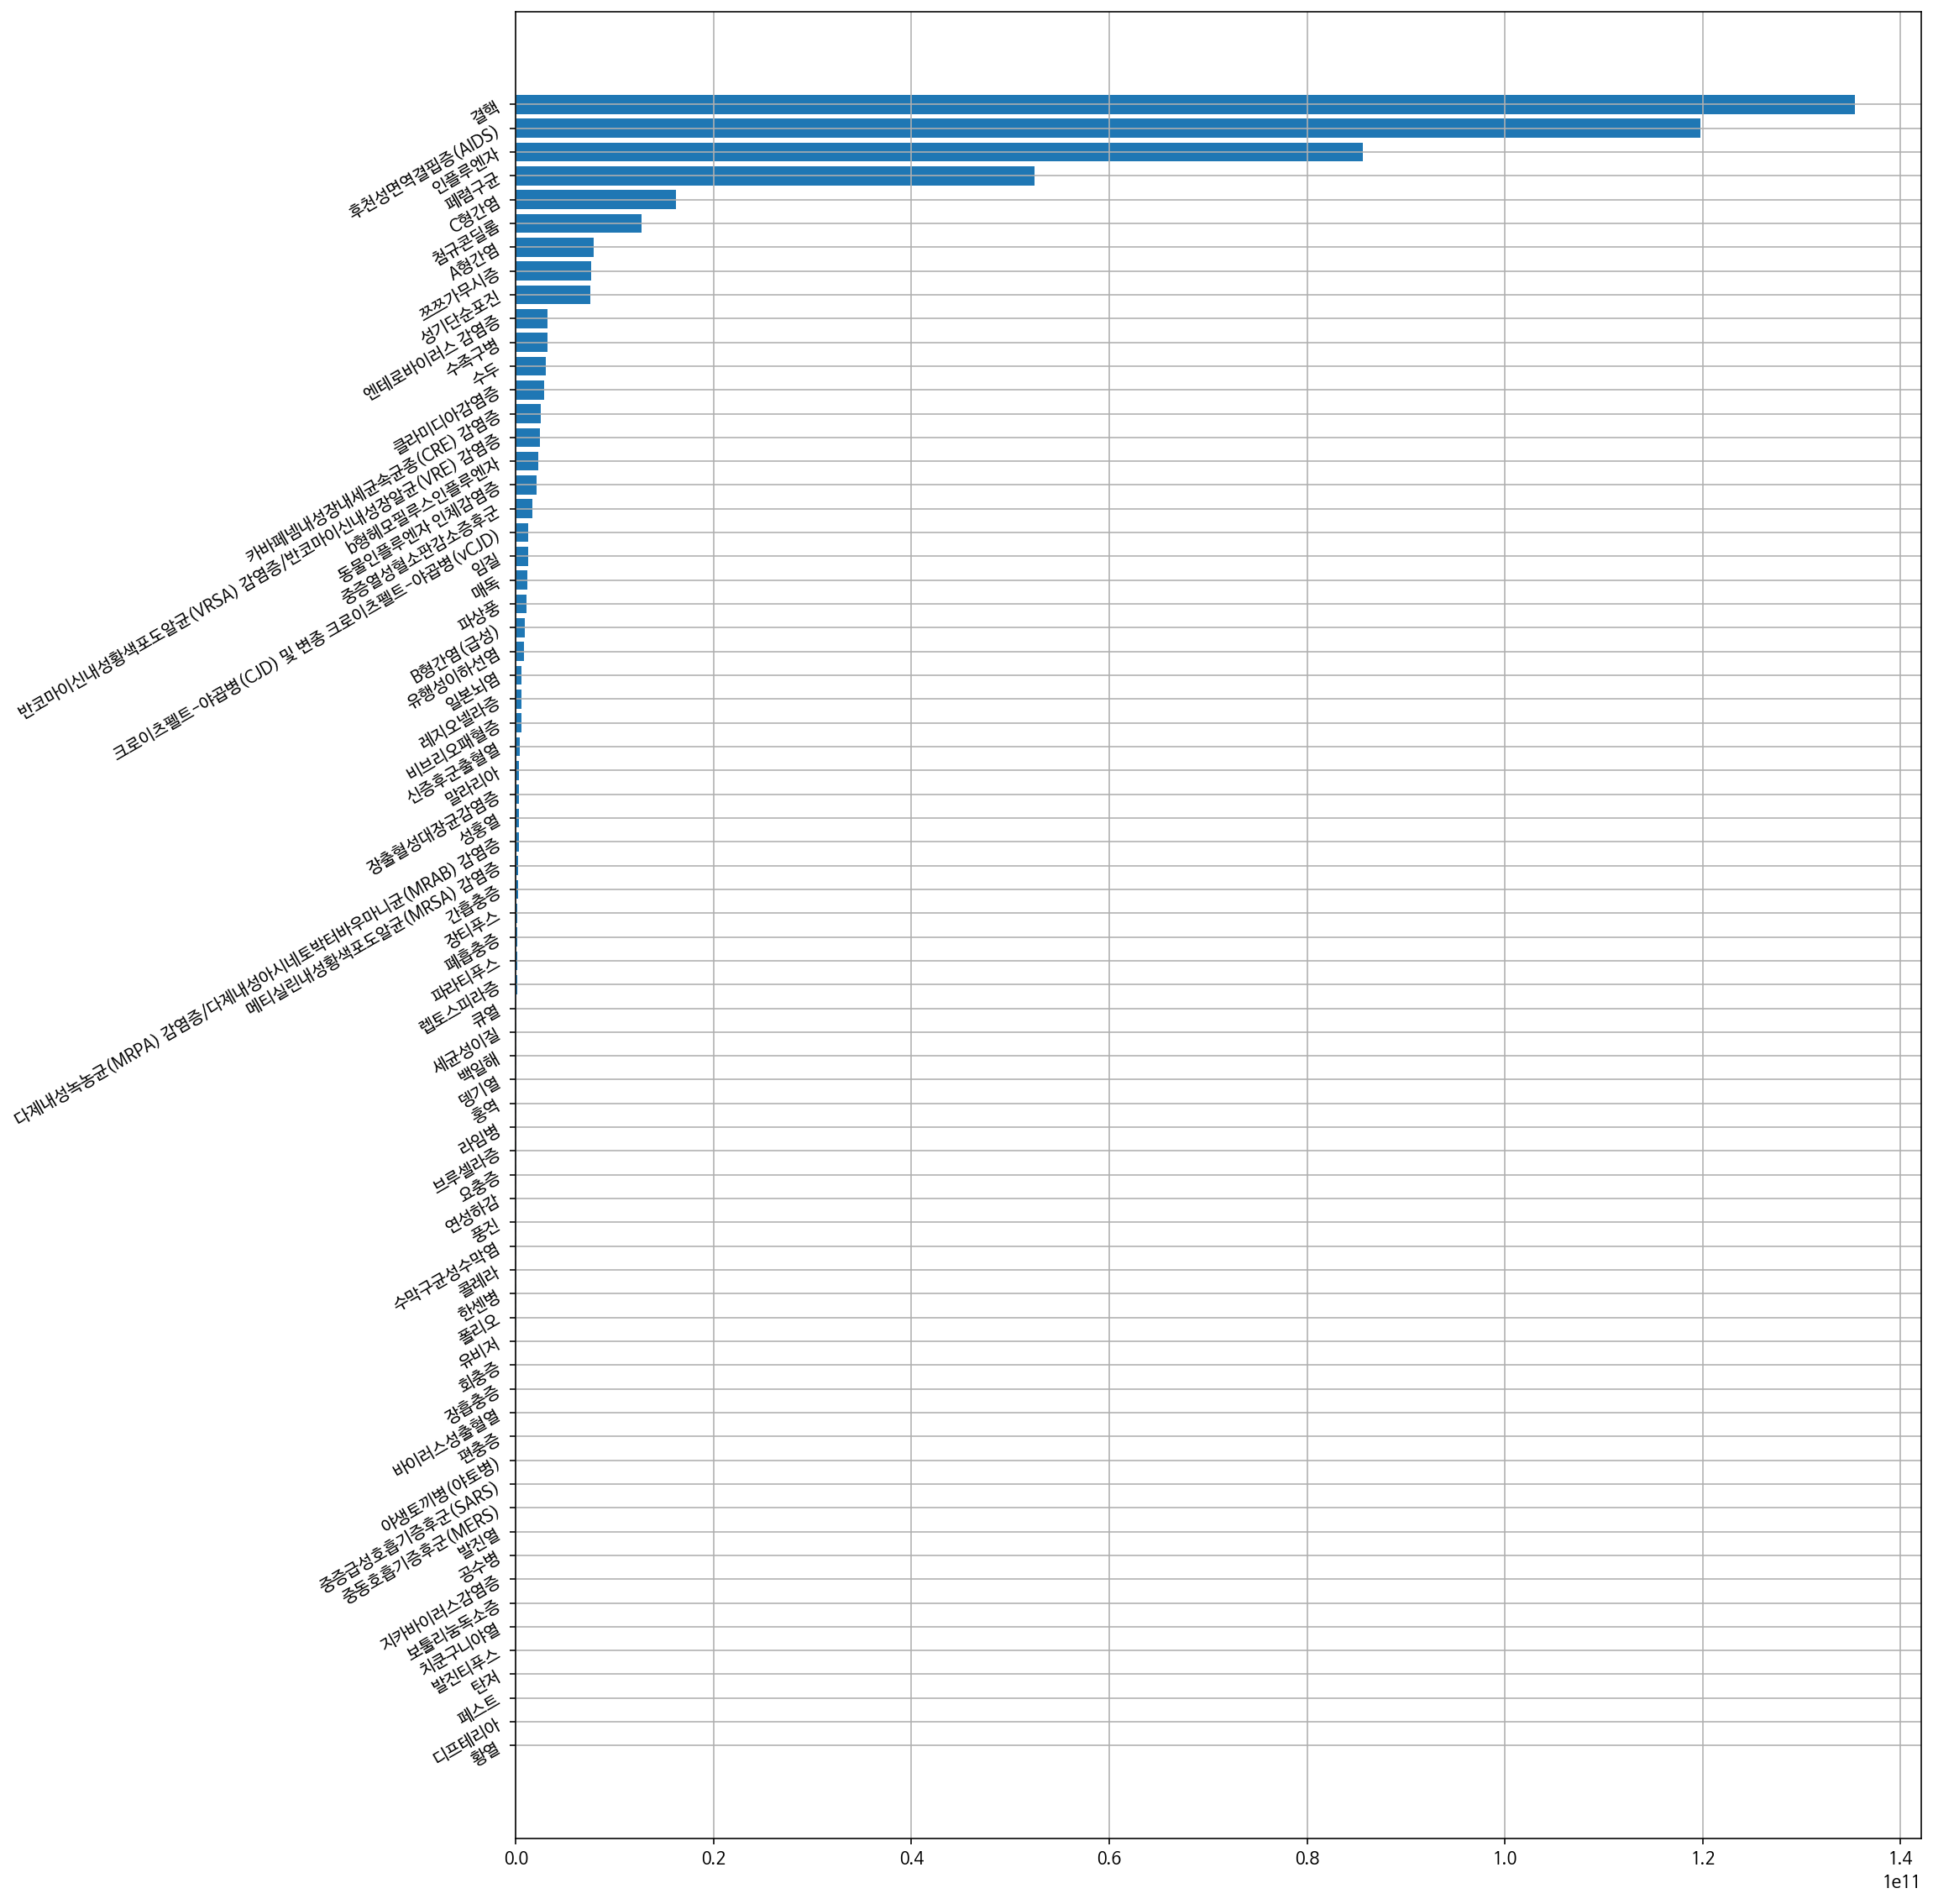

In [19]:
fig,ax = plt.subplots(figsize = (15,20))
plt.barh(sorted_2020['상병명'], sorted_2020['요양급여비용총액'])
plt.yticks(rotation=30)
plt.grid(True)

plt.show()

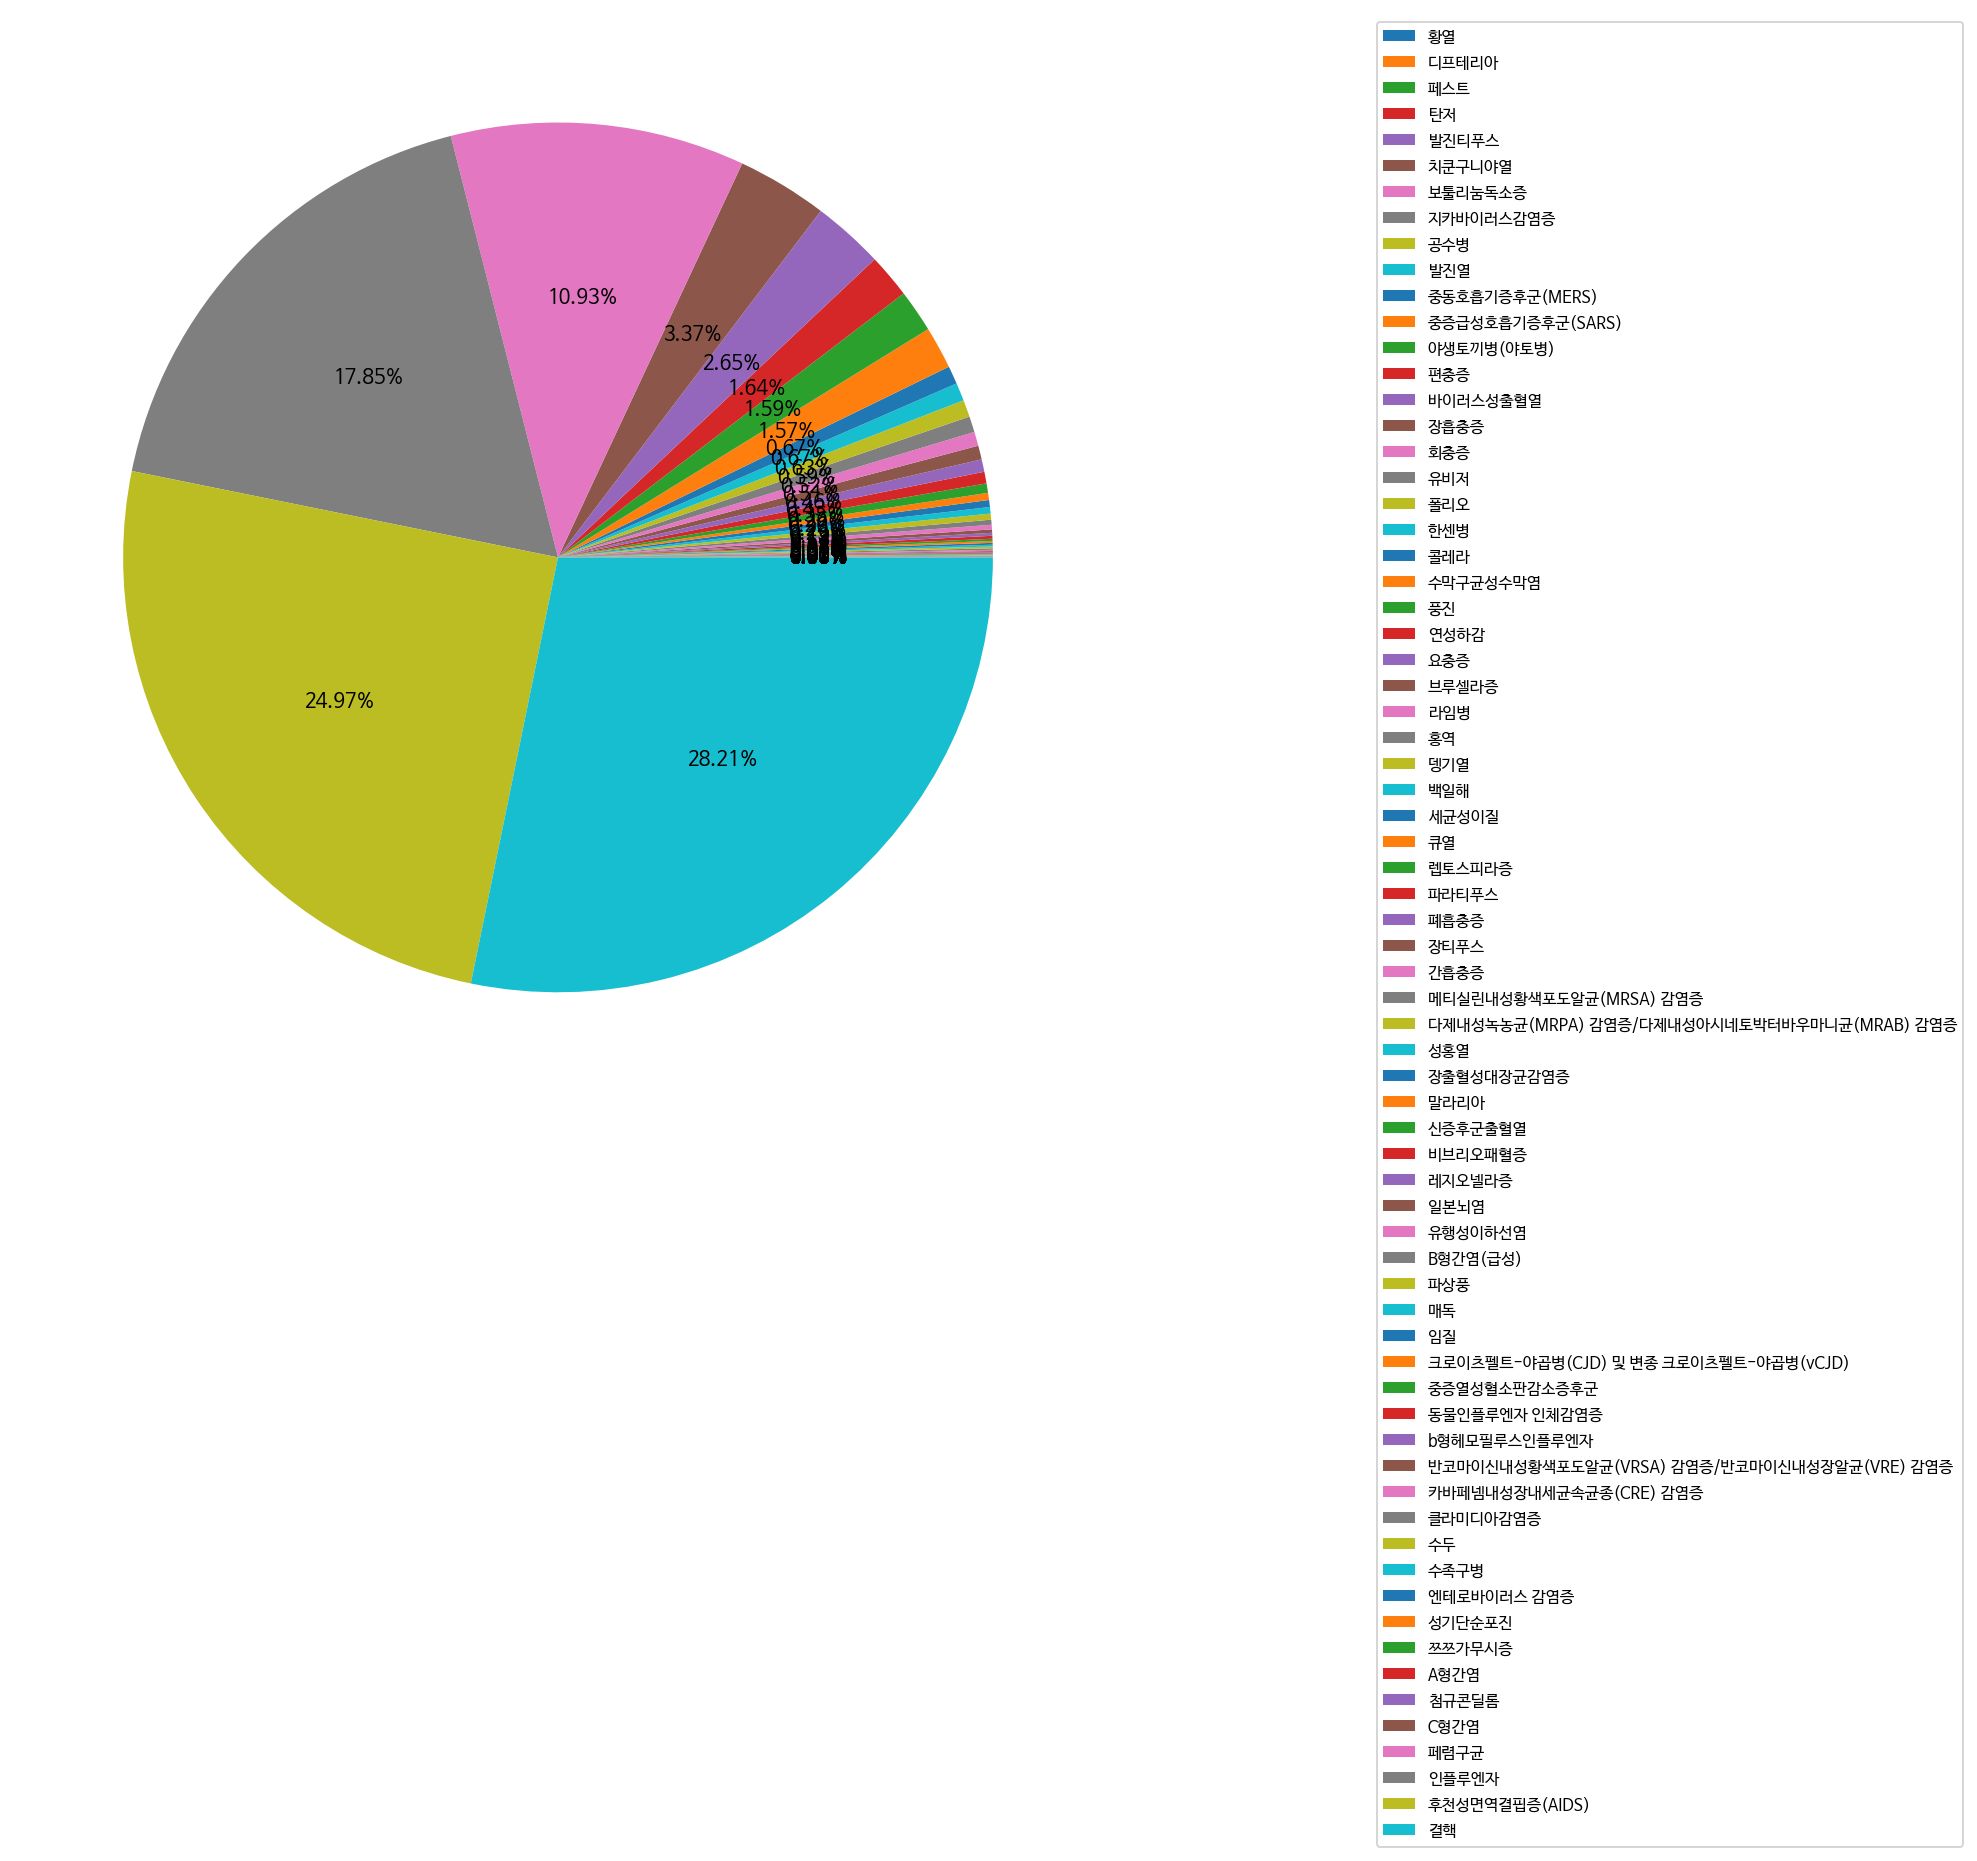

In [20]:
plt.figure(figsize=(10,10))
plt.pie(sorted_2020['요양급여비용총액'].values, autopct='%.2f%%')
plt.legend(sorted_2020['상병명'], loc = 'upper right',  bbox_to_anchor=(1.8, 1), prop={'size':8})

# 2020년 진료비 통계
- 결핵, AIDS, 인플루엔자, 폐렴구균 4가지 감염증이 진료비 총액 중 81.96% 차지

## 2020년 진료비 통계에 속한 서울시 통계
- 2020년 상병명 앞자리 3개 추출 -> 서울시 통계 질환 이름에 속하는 것 30개 구함
- 2020년 상병명에 속하지 않은 것 : '합계', '신종감염병증후군', 'E형간염'
- 'E형간염' : 2020년 법정감염병 분류가 개정되면서 신규로 추가됨
#### 오타로 인해 찾지 못한 것 
- df_2020['상병명' : 페렴구군 -> 폐렴구균 (고쳐야 함)
- df_seoul['법정감염병(2)'] :증열성혈소판감소증후군 -> 중증열성혈소판감소증후군 (고쳐야함)


In [21]:
print(df_seoul['법정감염병(2)'].nunique())
print(df_2020['상병명'].nunique())

34
70


In [22]:
df_seoul_uniq = df_seoul['법정감염병(2)'].unique()
df_seoul['법정감염병(2)'].unique()

array(['합계', '신종감염병증후군', '결핵', '수두', '홍역', '장티푸스', '파라티푸스', '세균성이질',
       '장출혈성대장균감염증', 'A형간염', '백일해', '유행성이하선염', '수막구균 감염증', '폐렴구균 감염증',
       '성홍열', '반코마이신내성황색포도알균 감염증', '카바페넴내성장내세균속균종 감염증', 'E형간염', '파상풍',
       'B형간염(급성)', 'C형간염', '말라리아', '레지오넬라증', '비브리오패혈증', '쯔쯔가무시증',
       '렙토스피라증', '브루셀라증', '신증후군출혈열', '크로이츠펠트-야콥병 및 변종크로이츠펠트-야콥병', '뎅기열',
       '큐열', '라임병', '증열성혈소판감소증후군', '지카바이러스감염증'], dtype=object)

In [23]:
df_2020['상병명'].unique()

array(['A형간염', 'B형간염(급성)', 'C형간염', 'b형헤모필루스인플루엔자', '간흡충증', '결핵', '공수병',
       '다제내성녹농균(MRPA) 감염증/다제내성아시네토박터바우마니균(MRAB) 감염증', '뎅기열',
       '동물인플루엔자 인체감염증', '디프테리아', '라임병', '레지오넬라증', '렙토스피라증', '말라리아', '매독',
       '메티실린내성황색포도알균(MRSA) 감염증', '바이러스성출혈열',
       '반코마이신내성황색포도알균(VRSA) 감염증/반코마이신내성장알균(VRE) 감염증', '발진열', '발진티푸스',
       '백일해', '보툴리눔독소증', '브루셀라증', '비브리오패혈증', '성기단순포진', '성홍열', '세균성이질',
       '수두', '수막구균성수막염', '수족구병', '신증후군출혈열', '야생토끼병(야토병)', '엔테로바이러스 감염증',
       '연성하감', '요충증', '유비저', '유행성이하선염', '인플루엔자', '일본뇌염', '임질',
       '장출혈성대장균감염증', '장티푸스', '장흡충증', '중동호흡기증후군(MERS)', '중증급성호흡기증후군(SARS)',
       '중증열성혈소판감소증후군', '지카바이러스감염증', '쯔쯔가무시증', '첨규콘딜롬', '치쿤구니야열',
       '카바페넴내성장내세균속균종(CRE) 감염증', '콜레라', '큐열',
       '크로이츠펠트-야곱병(CJD) 및 변종 크로이츠펠트-야곱병(vCJD)', '클라미디아감염증', '탄저', '파라티푸스',
       '파상풍', '페렴구균', '페스트', '편충증', '폐흡충증', '폴리오', '풍진', '한센병', '홍역',
       '황열', '회충증', '후천성면역결핍증(AIDS)'], dtype=object)

분류체계 개편
(개정 전) 제1군~제5군감염병 및 지정감염병 총 80종 → (개정 후) 제1급~제4급감염병 총 86종

① 바이러스성 출혈열(1종)을 개별 감염병(에볼라바이러스병, 마버그열, 라싸열, 크리미안콩고출혈열, 남아메리카출혈열, 리프트밸리열)으로 분리‧열거

② 인플루엔자 및 매독을 제4급감염병(표본감시대상)으로 변경

③ 사람유두종바이러스감염증을 제4급감염병에 신규 추가

④ E형간염을 제2급감염병에 신규 추가(2020.07.01.)
- http://www.busancidc.or.kr/html/egovframework/com/disease_popup.jsp

## 서울시 법정감염병 발생현황 & 2020 진료비 통계 [수정]
- df_2020['상병명' : 페렴구군 -> 폐렴구균 감염증
- df_seoul['법정감염병(2)'] :증열성혈소판감소증후군 -> 중증열성혈소판감소증후군 

In [25]:
df_seoul_re = df_seoul.replace('증열성혈소판감소증후군', "중증열성혈소판감소증후군")

In [26]:
df_seoul_re.tail()

,법정감염병,법정감염병(2),발생/사망,합계,종로구,중구,용산구,성동구,광진구,동대문구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
43,제3급감염병,큐열,발생,1,-,-,-,1,-,-,...,-,-,-,-,-,-,-,-,-,-
44,제3급감염병,라임병,발생,4,-,-,1,1,-,-,...,-,-,-,-,-,-,-,-,-,-
45,제3급감염병,중증열성혈소판감소증후군,발생,12,-,-,-,1,1,-,...,-,-,-,-,1,-,-,1,1,-
46,제3급감염병,중증열성혈소판감소증후군,사망,3,-,-,-,-,-,-,...,-,-,-,-,-,-,-,1,-,-
47,제3급감염병,지카바이러스감염증,발생,1,-,-,-,1,-,-,...,-,-,-,-,-,-,-,-,-,-


In [27]:
df_2020_re = df_2020.replace('페렴구균', '폐렴구균 감염증')
df_2020_re.tail(11)

,진료년도,상병명,환자수,명세서 청구건수,입내원일수,보험자부담금,요양급여비용총액,본인 일부부담금,요양급여비용총액/환자수
59,2020,폐렴구균 감염증,10730,27954,114669,44207738490,52424131830,8216393340,4.885753e+06
60,2020,페스트,2,2,2,35570,50670,15100,2.533500e+04
61,2020,편충증,74,82,82,3687300,5866700,2179400,7.927973e+04
62,2020,폐흡충증,677,889,1065,101638840,143353110,41714270,2.117476e+05
63,2020,폴리오,34,198,210,11886990,16816230,4929240,4.945950e+05
64,2020,풍진,129,188,226,18978730,23419850,4441120,1.815492e+05
65,2020,한센병,116,158,272,12787800,17219270,4431470,1.484420e+05
66,2020,홍역,157,189,256,35839600,45346890,9507290,2.888337e+05
67,2020,황열,2,2,2,16280,23080,6800,1.154000e+04
68,2020,회충증,647,743,754,6660070,9308060,2647990,1.438649e+04


## 계층적 색인

In [28]:
df_seoul_01 = df_seoul_re.iloc[:, [0,1,2,3]]
df_seoul_01.head()  

,법정감염병,법정감염병(2),발생/사망,합계
0,제1급감염병,합계,발생,18996
1,제1급감염병,합계,사망,183
2,제1급감염병,신종감염병증후군,발생,18996
3,제1급감염병,신종감염병증후군,사망,183
4,제2급감염병,합계,발생,15002


In [29]:
df_seoul_01_uniq = df_seoul_01['법정감염병(2)'].unique()
df_2020_re_uniq  = df_2020_re['상병명'].unique()
list_2 = []
for i in df_2020_re_uniq:
  h = i[0:3] 
  list_2.append(h)
print(list_2)


['A형간', 'B형간', 'C형간', 'b형헤', '간흡충', '결핵', '공수병', '다제내', '뎅기열', '동물인', '디프테', '라임병', '레지오', '렙토스', '말라리', '매독', '메티실', '바이러', '반코마', '발진열', '발진티', '백일해', '보툴리', '브루셀', '비브리', '성기단', '성홍열', '세균성', '수두', '수막구', '수족구', '신증후', '야생토', '엔테로', '연성하', '요충증', '유비저', '유행성', '인플루', '일본뇌', '임질', '장출혈', '장티푸', '장흡충', '중동호', '중증급', '중증열', '지카바', '쯔쯔가', '첨규콘', '치쿤구', '카바페', '콜레라', '큐열', '크로이', '클라미', '탄저', '파라티', '파상풍', '폐렴구', '페스트', '편충증', '폐흡충', '폴리오', '풍진', '한센병', '홍역', '황열', '회충증', '후천성']


In [30]:
df_seoul_01_list = []
df_2020_re_list = []

for i in list_2:
  for j in df_seoul_01_uniq: 
      if i in j :
         df_seoul_01_list.append(j)
      else:
        pass

list_2 = []
for i in df_seoul_01_list:
  h = i[0:3] 
  list_2.append(h)
# print(list_2)

for i in list_2:
  for j in df_2020_re_uniq: 
      if i in j :
         df_2020_re_list.append(j)
      else:
        pass

df_seoul_01_list.sort()
df_2020_re_list.sort()

print(df_seoul_01_list)
print(len(df_seoul_01_list))
print(df_2020_re_list)
print(len(df_2020_re_list))


['A형간염', 'B형간염(급성)', 'C형간염', '결핵', '뎅기열', '라임병', '레지오넬라증', '렙토스피라증', '말라리아', '반코마이신내성황색포도알균 감염증', '백일해', '브루셀라증', '비브리오패혈증', '성홍열', '세균성이질', '수두', '수막구균 감염증', '신증후군출혈열', '유행성이하선염', '장출혈성대장균감염증', '장티푸스', '중증열성혈소판감소증후군', '지카바이러스감염증', '지카바이러스감염증', '쯔쯔가무시증', '카바페넴내성장내세균속균종 감염증', '큐열', '크로이츠펠트-야콥병 및 변종크로이츠펠트-야콥병', '파라티푸스', '파상풍', '폐렴구균 감염증', '홍역']
32
['A형간염', 'B형간염(급성)', 'C형간염', '결핵', '뎅기열', '라임병', '레지오넬라증', '렙토스피라증', '말라리아', '반코마이신내성황색포도알균(VRSA) 감염증/반코마이신내성장알균(VRE) 감염증', '백일해', '브루셀라증', '비브리오패혈증', '성홍열', '세균성이질', '수두', '수막구균성수막염', '신증후군출혈열', '유행성이하선염', '장출혈성대장균감염증', '장티푸스', '중증열성혈소판감소증후군', '지카바이러스감염증', '지카바이러스감염증', '쯔쯔가무시증', '카바페넴내성장내세균속균종(CRE) 감염증', '큐열', '크로이츠펠트-야곱병(CJD) 및 변종 크로이츠펠트-야곱병(vCJD)', '파라티푸스', '파상풍', '폐렴구균 감염증', '홍역']
32


## 서울시 통계에 있는 상병명과 일치되는 값을 2020 통계에서 찾기
- np.where :ValueError: ('Lengths must match to compare', (70,), (32,))

In [31]:
# np.where(df_2020_re['상병명'] == df_2020_re_list)

In [32]:
def find_indices(lst, condition):
...   return [i for i, elem in enumerate(lst) if condition(elem)]
...
index = find_indices(df_2020_re['상병명'], lambda e: e in df_2020_re_list)

In [33]:
len(index)

31

- 지카바이러스감염증 중복이 사라져서 31개 인 듯하다

In [34]:
df_2020_re02 = df_2020_re.iloc[index]
df_2020_re02.reset_index()
df_2020_re02.sort_values('상병명')
df_2020_re02 = df_2020_re02.loc[:,['상병명','요양급여비용총액/환자수', '환자수', '요양급여비용총액']]
df_2020_re02.head()

,상병명,요양급여비용총액/환자수,환자수,요양급여비용총액
0,A형간염,1.510453e+06,5202,7857374850
1,B형간염(급성),4.599163e+05,1947,895457130
2,C형간염,4.302776e+05,37526,16146596790
5,결핵,2.991711e+06,45243,135353970090
8,뎅기열,8.259632e+05,62,51209720


In [35]:
df_seoul_02 = df_seoul_01.replace(['반코마이신내성황색포도알균 감염증', '카바페넴내성장내세균속균종 감염증', '크로이츠펠트-야콥병 및 변종크로이츠펠트-야콥병',], 
                    ['반코마이신내성황색포도알균(VRSA) 감염증/반코마이신내성장알균(VRE) 감염증','카바페넴내성장내세균속균종(CRE) 감염증','크로이츠펠트-야곱병(CJD) 및 변종 크로이츠펠트-야곱병(vCJD)'])
df_seoul_02.drop(df_seoul_02.index[[0,1,2,3]], inplace=True)
df_seoul_02.head(10)

,법정감염병,법정감염병(2),발생/사망,합계
4,제2급감염병,합계,발생,15002
5,제2급감염병,합계,사망,317
6,제2급감염병,결핵,발생,3486
7,제2급감염병,결핵,사망,207
8,제2급감염병,수두,발생,3870
9,제2급감염병,홍역,발생,1
10,제2급감염병,장티푸스,발생,8
11,제2급감염병,파라티푸스,발생,4
12,제2급감염병,세균성이질,발생,3
13,제2급감염병,장출혈성대장균감염증,발생,21


In [36]:
# df_seoul_02.set_index('법정감염병','법정감염병(2)') # 이거 딱히 필요 없을 듯

In [37]:
merge_df = pd.merge(df_seoul_02, df_2020_re02, left_on = '법정감염병(2)', right_on = '상병명')
merge_df.head()

,법정감염병,법정감염병(2),발생/사망,합계,상병명,요양급여비용총액/환자수,환자수,요양급여비용총액
0,제2급감염병,결핵,발생,3486,결핵,2.991711e+06,45243,135353970090
1,제2급감염병,결핵,사망,207,결핵,2.991711e+06,45243,135353970090
2,제2급감염병,수두,발생,3870,수두,1.034312e+05,29405,3041395240
3,제2급감염병,홍역,발생,1,홍역,2.888337e+05,157,45346890
4,제2급감염병,장티푸스,발생,8,장티푸스,9.883788e+05,152,150233570


In [38]:
merge_df['서울시진료비총합'] = merge_df['합계']  * merge_df['요양급여비용총액/환자수']
merge_df.head()

,법정감염병,법정감염병(2),발생/사망,합계,상병명,요양급여비용총액/환자수,환자수,요양급여비용총액,서울시진료비총합
0,제2급감염병,결핵,발생,3486,결핵,2.991711e+06,45243,135353970090,1.042910e+10
1,제2급감염병,결핵,사망,207,결핵,2.991711e+06,45243,135353970090,6.192841e+08
2,제2급감염병,수두,발생,3870,수두,1.034312e+05,29405,3041395240,4.002788e+08
3,제2급감염병,홍역,발생,1,홍역,2.888337e+05,157,45346890,2.888337e+05
4,제2급감염병,장티푸스,발생,8,장티푸스,9.883788e+05,152,150233570,7.907030e+06


## 지수표현없이 숫자 표시

In [39]:
pd.options.display.float_format = '{:.3f}'.format
merge_df.head()

,법정감염병,법정감염병(2),발생/사망,합계,상병명,요양급여비용총액/환자수,환자수,요양급여비용총액,서울시진료비총합
0,제2급감염병,결핵,발생,3486,결핵,2991710.764,45243,135353970090,10429103722.869
1,제2급감염병,결핵,사망,207,결핵,2991710.764,45243,135353970090,619284128.122
2,제2급감염병,수두,발생,3870,수두,103431.227,29405,3041395240,400278849.815
3,제2급감염병,홍역,발생,1,홍역,288833.694,157,45346890,288833.694
4,제2급감염병,장티푸스,발생,8,장티푸스,988378.750,152,150233570,7907030.000


In [40]:
merge_df02 = merge_df.drop(['발생/사망','요양급여비용총액/환자수','법정감염병(2)'], axis = 1)
merge_df02 = merge_df02.groupby('상병명').sum()
merge_df02 = merge_df02.sort_values('서울시진료비총합', ascending = False)
merge_df02

,합계,환자수,요양급여비용총액,서울시진료비총합
상병명,,,,
카바페넴내성장내세균속균종(CRE) 감염증,5243,578,5032871940,45652850486.886
결핵,3693,90486,270707940180,11048387850.991
A형간염,809,5202,7857374850,1221956219.464
레지오넬라증,111,140,1052948140,834837453.857
C형간염,1723,37526,16146596790,741368285.167
수두,3870,29405,3041395240,400278849.815
폐렴구균 감염증,76,21460,104848263660,371317243.158
크로이츠펠트-야곱병(CJD) 및 변종 크로이츠펠트-야곱병(vCJD),20,216,2532636900,234503416.667
비브리오패혈증,14,80,1049650140,183688774.500


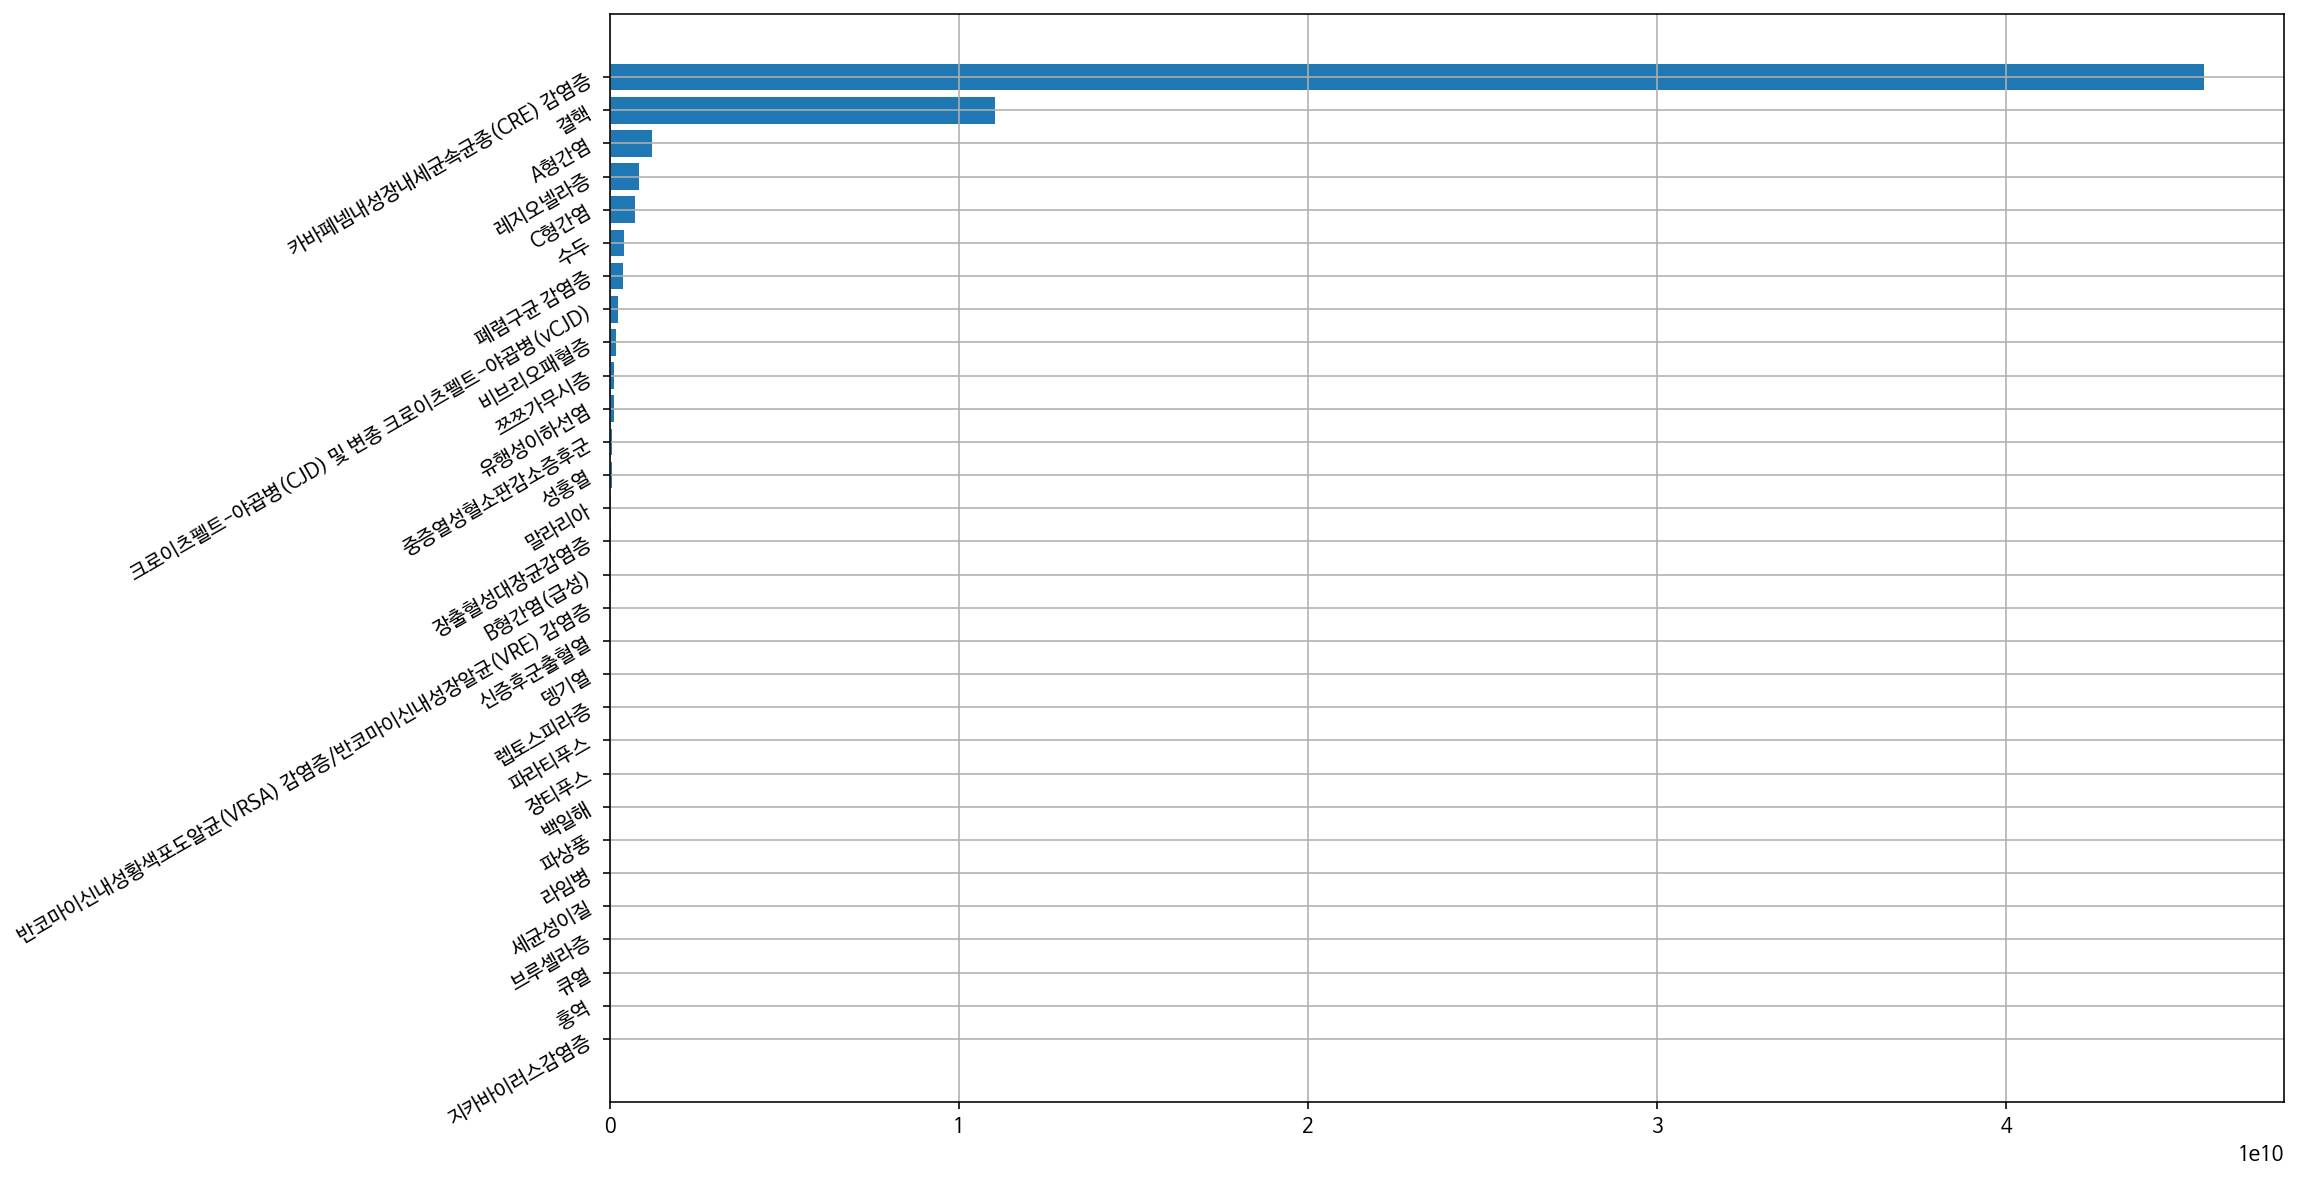

In [41]:
merge_df02 = merge_df02.sort_values('서울시진료비총합', ascending = True)

fig,ax = plt.subplots(figsize = (15,10))
plt.barh(merge_df02.index, merge_df02['서울시진료비총합'])
plt.yticks(rotation=30)
plt.grid(True)

plt.show()

## 파이차트로 퍼센트 비교하기


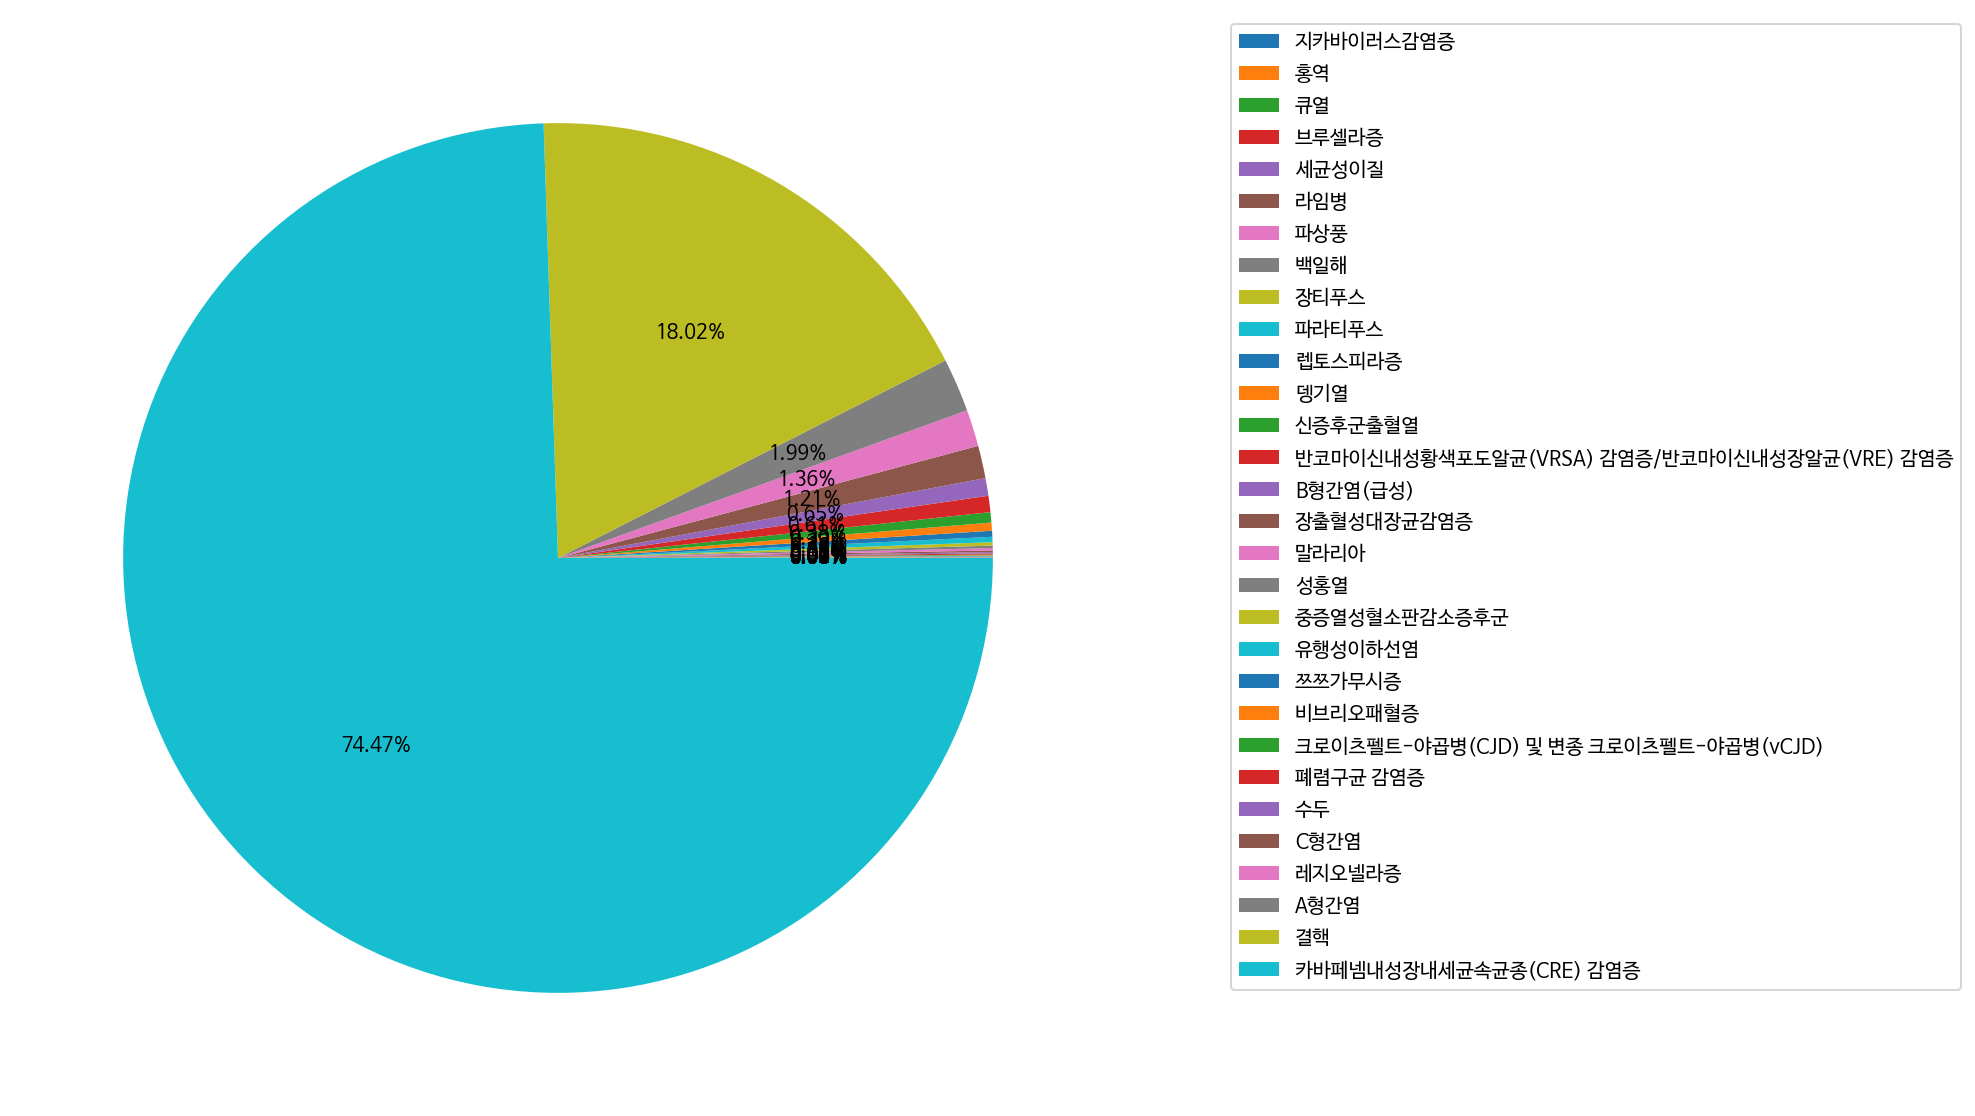

In [42]:
plt.figure(figsize=(10,10))
plt.pie(merge_df02['서울시진료비총합'].values, autopct='%.2f%%')
plt.legend(merge_df02.index, loc = 'upper right',  bbox_to_anchor=(1.8, 1))

## 서울시 법정 감염병 2020년 진료비 중
- 카바페넴내성장내세균속균종(CRE)감염증이 74.47%
- 결핵DL 18.02%로 
- 두 감염증 만으로 92.49% 차지
- 약 567억 0123만원